Linear Regression using a Dataset of Facebook metrics 
Citation at the bottom

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [2]:
dfLinear = pd.read_csv("data/dataset_Facebook.csv", sep=';')
print(type(dfLinear))
dfLinear.head()

<class 'pandas.core.frame.DataFrame'>


,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [3]:
print(dfLinear.shape)

(500, 19)


In [4]:
dfLinear.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


the count of paid is missing an input

In [5]:
dfLinear = dfLinear[dfLinear["Paid"].notnull()]
dfLinear = dfLinear[dfLinear["comment"].notnull()]
dfLinear = dfLinear[dfLinear["share"].notnull()]
dfLinear.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,4.950000e+02,495.000000,495.000000,495.000000,4.950000e+02,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,123173.268687,1.886869,7.028283,4.133333,7.844444,0.280808,14028.101010,2.985698e+04,926.830303,804.155556,1425.921212,1.691628e+04,6641.355556,614.135354,7.557576,179.145455,27.264646,213.967677
std,16203.818031,0.853268,3.304274,2.030735,4.385064,0.449849,22821.050008,7.714291e+04,987.713267,885.184440,2007.663460,6.007402e+04,7700.266455,614.346297,21.274384,324.412161,42.656388,381.677449
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.000000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,112324.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3331.000000,5.798000e+03,399.000000,335.000000,512.500000,4.073500e+03,2213.000000,297.500000,1.000000,57.000000,10.000000,72.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5290.000000,9.084000e+03,630.000000,555.000000,861.000000,6.282000e+03,3478.000000,416.000000,3.000000,101.000000,19.000000,125.000000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13248.000000,2.250300e+04,1062.000000,969.000000,1479.000000,1.514300e+04,8018.000000,658.500000,7.000000,188.000000,32.500000,231.000000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.000000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.000000,5172.000000,790.000000,6334.000000


For the purpuse of prediction we are only intrested in the features that are known prior to the posting.

In [6]:
# dfLinearClean = dfLinear.drop(columns = 'duration')
# dfLinearClean["default"] = dfLinearClean["default"].map({"yes": 1, "no": 0})
# dfLinearClean["housing"] = dfLinearClean["housing"].map({"yes": 1, "no": 0})
# dfLinearClean["loan"] = dfLinearClean["loan"].map({"yes": 1, "no": 0})
# dfLinearClean["y"] = dfLinearClean["y"].map({"yes": 1, "no": 0})
# dfLinearClean["month"] = dfLinearClean["month"].map({"jan": 1, "feb": 2,"mar": 3, "apr": 4,"may":5, "jun": 6,"jul": 7, "aug": 8,"sep": 9, "oct": 10,"nov": 11, "dec": 12})
# dfLinearClean["education"] = dfLinearClean["education"].map({"unknown":-1,"primary":1,"secondary":2,"tertiary":3 })
# dfLinearClean.head()

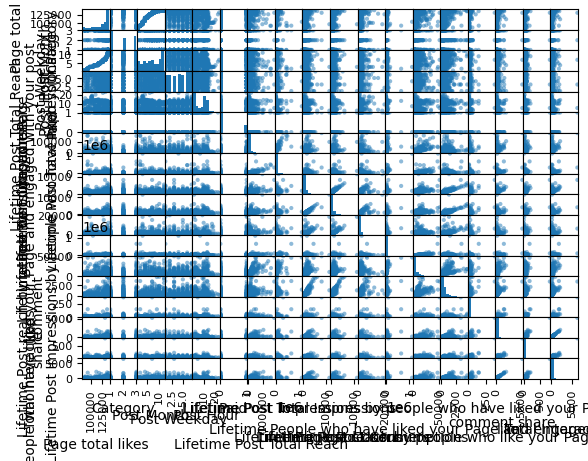

<Figure size 640x480 with 0 Axes>

In [7]:
scatter_matrix(dfLinear)
plt.show()
plt.savefig('plots/dfLinearFacebook.png')

this has too much information to be read easily 

In [8]:
dfLinearClean = dfLinear.drop(columns = 'Type')
#features below are not known till after a post has been made
#Lifetime Post Total Reach	Lifetime Post Total Impressions	Lifetime Engaged Users	Lifetime Post Consumers	Lifetime Post Consumptions	Lifetime Post Impressions by people who have liked your Page	Lifetime Post reach by people who like your Page	Lifetime People who have liked your Page and engaged with your post	comment	like	share	Total Interactions
#remove all but life time engaged users - The number of people who clicked anywhere in a post (unique users)
dfLinearClean = dfLinearClean.drop(columns = ['Lifetime Post Total Reach',	'share','Lifetime Post Total Impressions',		'Lifetime Post Consumers',	'Lifetime Post Consumptions',	'Lifetime Post Impressions by people who have liked your Page',	'Lifetime Post reach by people who like your Page',	'Lifetime People who have liked your Page and engaged with your post',	'comment',	'like',	'Total Interactions'])
dfLinearClean.corr()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Engaged Users
Page total likes,1.000000,-0.084925,0.940892,-0.012685,-0.150466,0.009406,-0.110379
Category,-0.084925,1.000000,-0.121637,-0.045016,-0.106965,-0.027818,-0.002569
Post Month,0.940892,-0.121637,1.000000,0.009694,-0.181316,-0.014887,-0.113358
Post Weekday,-0.012685,-0.045016,0.009694,1.000000,0.045980,0.003250,-0.042740
Post Hour,-0.150466,-0.106965,-0.181316,0.045980,1.000000,-0.069143,0.003748
Paid,0.009406,-0.027818,-0.014887,0.003250,-0.069143,1.000000,0.113796
Lifetime Engaged Users,-0.110379,-0.002569,-0.113358,-0.042740,0.003748,0.113796,1.000000


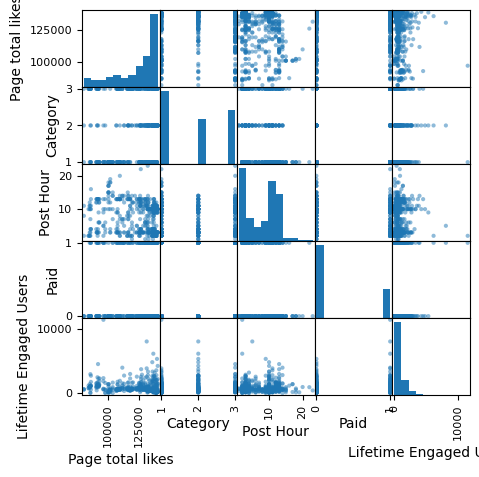

<Figure size 640x480 with 0 Axes>

In [9]:

#scatter_matrix(dfLinearClean,figsize=(6, 6))
dfLinearCleanScatterSpecial=dfLinearClean.drop(columns = ['Post Month','Post Weekday'])
scatter_matrix(dfLinearCleanScatterSpecial,figsize=(5, 5))
plt.show()
plt.savefig('plots/dfLinearCleanFacebook.png')

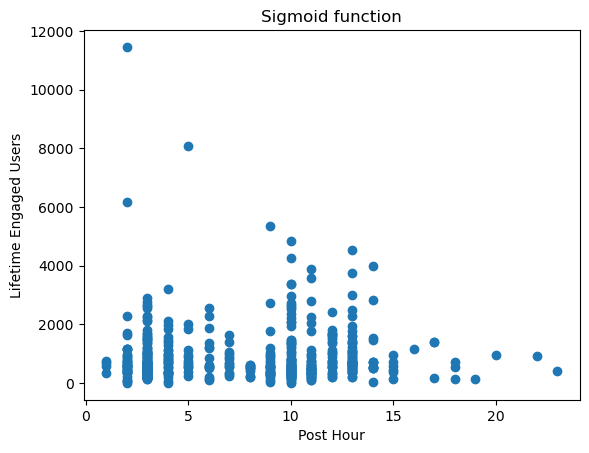

In [31]:
plt.scatter(dfLinearClean["Post Hour"],dfLinearClean["Lifetime Engaged Users"])
plt.xlabel("Post Hour")
plt.ylabel("Lifetime Engaged Users")
plt.title('Sigmoid function')
plt.savefig('plots/dfLinearCleanFacebookHourLEU.png')
plt.show()

This is more legible

### prepare the data

In [11]:
X= dfLinearClean.drop(columns = ['Lifetime Engaged Users'])
y = dfLinearClean["Lifetime Engaged Users"]
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)
dfLinearClean.head()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Engaged Users
0,139441,2,12,4,3,0.0,178
1,139441,2,12,3,10,0.0,1457
2,139441,3,12,3,3,0.0,177
3,139441,2,12,2,10,1.0,2211
4,139441,2,12,2,3,0.0,671


### modle building

In [12]:
modelF = LinearRegression()
modelF.fit(X_train,y_train)

print('intercept:', modelF.intercept_)
print('slopes:', modelF.coef_)
print('R squared:', modelF.score(X_train,y_train))

intercept: 1645.9106230888092
slopes: [-3.10405910e-03 -2.70809407e+01 -2.37906082e+01 -3.41849105e+01
 -3.74562275e+00  2.85095475e+02]
R squared: 0.03340839201719481


In [13]:
yhat=modelF.predict(X_test)
print(mean_squared_error(y_test,yhat,squared=False))

686.7983325990537


In [14]:
#cross validation
scores = cross_val_score(modelF,X_train,y_train,cv=5)
print(scores)
print(scores.mean())

[-0.02419349 -0.18269529 -0.13632491  0.05310292 -0.07859627]
-0.07374140868120797


This is a terrible Model 
hopefully adding in the type of the post will increase the r value and reduce the mean_squared_error

In [15]:
dfLinearCleanOneHot = dfLinear.drop(columns = ['Lifetime Post Total Reach',	'share','Lifetime Post Total Impressions',		'Lifetime Post Consumers',	'Lifetime Post Consumptions',	'Lifetime Post Impressions by people who have liked your Page',	'Lifetime Post reach by people who like your Page',	'Lifetime People who have liked your Page and engaged with your post',	'comment',	'like',	'Total Interactions'])
dfLinearCleanOneHot = pd.get_dummies(dfLinearCleanOneHot,dtype=int)
dfLinearCleanOneHot.head()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Engaged Users,Type_Link,Type_Photo,Type_Status,Type_Video
0,139441,2,12,4,3,0.0,178,0,1,0,0
1,139441,2,12,3,10,0.0,1457,0,0,1,0
2,139441,3,12,3,3,0.0,177,0,1,0,0
3,139441,2,12,2,10,1.0,2211,0,1,0,0
4,139441,2,12,2,3,0.0,671,0,1,0,0


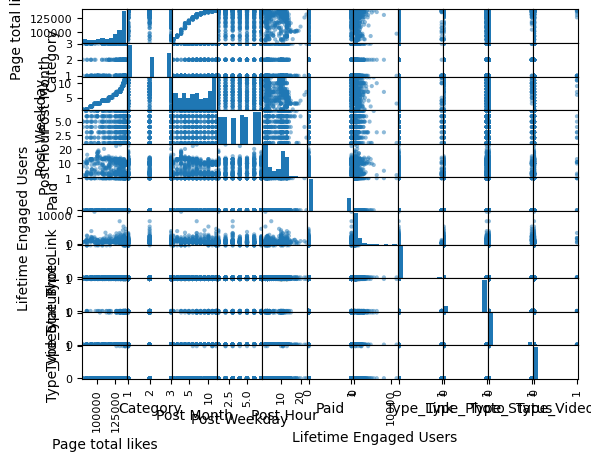

<Figure size 640x480 with 0 Axes>

In [16]:
#dfLinearCleanOneHot = dfLinear.drop(columns = ['Lifetime Post Total Reach',	'share','Lifetime Post Total Impressions',		'Lifetime Post Consumers',	'Lifetime Post Consumptions',	'Lifetime Post Impressions by people who have liked your Page',	'Lifetime Post reach by people who like your Page',	'Lifetime People who have liked your Page and engaged with your post',	'comment',	'like',	'Total Interactions'])
#dfLinearCleanOneHot = pd.get_dummies(dfLinearCleanOneHot)
scatter_matrix(dfLinearCleanOneHot)
plt.show()
plt.savefig('plots/dfLinearCleanOneHotScatter.png')

### prepare data with type

In [17]:
X2= dfLinearCleanOneHot.drop(columns = ['Lifetime Engaged Users'])
y = dfLinearClean["Lifetime Engaged Users"]
X2_train,X2_test,y_train,y_test=train_test_split(X2,y,random_state=1)

### build the model

In [18]:
modelF2 = LinearRegression()
modelF2.fit(X2_train,y_train)

print('intercept:', modelF2.intercept_)
print('slopes:', modelF2.coef_)
print('R squared train:', modelF2.score(X2_train,y_train))
print('R squared test:', modelF2.score(X2_test,y_test))
print('Old R squared train:', modelF.score(X_train,y_train))
print('Old R squared test:', modelF.score(X_test,y_test))

intercept: 3079.696904967474
slopes: [-1.03750928e-02 -7.35416270e+01 -2.35247076e+01 -5.57103264e+01
 -7.70737585e+00  2.54134450e+02 -1.13285101e+03 -4.51585356e+02
  1.11466455e+03  4.69771814e+02]
R squared train: 0.23911395086883036
R squared test: -0.043521439792359784
Old R squared train: 0.03340839201719481
Old R squared test: -0.038247203379509154


This is still rather low but it is over 7 times more acurate then previously

In [19]:
y2hat=modelF2.predict(X2_test)
print("New mean Squared Error",mean_squared_error(y_test,y2hat,squared=False))
yhat=modelF.predict(X_test)
print("Old mean Squared Error",mean_squared_error(y_test,yhat,squared=False))

New mean Squared Error 688.5405709090135
Old mean Squared Error 686.7983325990537


This R value has massively increased meaning the model better at explaining varience in the output from the input, but the mean Squared error has increased this could be caused by the outliers that you can see in the isolated dots under Livetime engaged users in 
"dfLinearCleanFacebook.png", these are viral posts that had much more interaction then the other posts made by the comany

### making a prediction

In [20]:
#making a prediction (Without Type)
#Page total likes	Category	Post Month	Post Weekday	Post Hour	Paid	Lifetime Engaged Users	Type_Link	Type_Photo	Type_Status	Type_Video
newData=[['100000','1',	'11','6','23','1']]
newDF=pd.DataFrame(newData, columns=['Page total likes','Category','Post Month','Post Weekday','Post Hour','Paid'])
print(newDF)
y_hat = modelF.predict(newDF)
print('y_hat (without type)', y_hat)

  Page total likes Category Post Month Post Weekday Post Hour Paid
0           100000        1         11            6        23    1
y_hat (without type) [1040.56377139]


In [21]:
#making a prediction (Without Type)
#Page total likes	Category	Post Month	Post Weekday	Post Hour	Paid	Lifetime Engaged Users	Type_Link	Type_Photo	Type_Status	Type_Video
newData2=[['100000','1','11','6','23','1','0','0','0','1']]
newDF2=pd.DataFrame(newData2, columns=['Page total likes','Category','Post Month','Post Weekday','Post Hour','Paid','Type_Link','Type_Photo','Type_Status','Type_Video'])
print(newDF2)
y2_hat = modelF2.predict(newDF2)
print('y2_hat (with type)', y2_hat)

  Page total likes Category Post Month Post Weekday Post Hour Paid Type_Link  \
0           100000        1         11            6        23    1         0   

  Type_Photo Type_Status Type_Video  
0          0           0          1  
y2_hat (with type) [1922.24887898]


### Prepare with type and one hot category

In [22]:
dfLinearCleanOneHot = dfLinear.drop(columns = ['Lifetime Post Total Reach',	'share','Lifetime Post Total Impressions',		'Lifetime Post Consumers',	'Lifetime Post Consumptions',	'Lifetime Post Impressions by people who have liked your Page',	'Lifetime Post reach by people who like your Page',	'Lifetime People who have liked your Page and engaged with your post',	'comment',	'like',	'Total Interactions'])
dfLinearCleanOneHot = pd.get_dummies(dfLinearCleanOneHot,dtype=int)
dfLinearCleanOneHot.head()
dfLinearCleanSuperOneHot = pd.get_dummies(dfLinearCleanOneHot, columns=['Category'], prefix='Category',dtype=int)
print(dfLinearCleanSuperOneHot)

     Page total likes  Post Month  Post Weekday  Post Hour  Paid  \
0              139441          12             4          3   0.0   
1              139441          12             3         10   0.0   
2              139441          12             3          3   0.0   
3              139441          12             2         10   1.0   
4              139441          12             2          3   0.0   
..                ...         ...           ...        ...   ...   
494             85093           1             7         10   0.0   
495             85093           1             7          2   0.0   
496             81370           1             5          8   0.0   
497             81370           1             5          2   0.0   
498             81370           1             4         11   0.0   

     Lifetime Engaged Users  Type_Link  Type_Photo  Type_Status  Type_Video  \
0                       178          0           1            0           0   
1                      14

In [23]:
X3= dfLinearCleanSuperOneHot.drop(columns = ['Lifetime Engaged Users'])
y = dfLinearClean["Lifetime Engaged Users"]
X3_train,X3_test,y_train,y_test=train_test_split(X3,y,random_state=1)

### Build the model with type and one hot category

In [24]:
modelF3 = LinearRegression()
modelF3.fit(X3_train,y_train)

print('intercept:', modelF3.intercept_)
print('slopes:', modelF3.coef_)
print('R squared train:', modelF3.score(X3_train,y_train))
print('R squared test:', modelF3.score(X3_test,y_test))
print('Old R2 squared train:', modelF2.score(X2_train,y_train))
print('Old R2 squared test:', modelF2.score(X2_test,y_test))
print('Old R squared train:', modelF.score(X_train,y_train))
print('Old R squared test:', modelF.score(X_test,y_test))

intercept: 2962.183093244922
slopes: [-1.07025691e-02 -2.24039370e+01 -5.53886210e+01 -7.33199623e+00
  2.55084368e+02 -1.12768452e+03 -4.49633951e+02  1.09788625e+03
  4.79432219e+02  6.31741563e+01  2.13051118e+01 -8.44792681e+01]
R squared train: 0.23925173694210722
R squared test: -0.04458470127145908
Old R2 squared train: 0.23911395086883036
Old R2 squared test: -0.043521439792359784
Old R squared train: 0.03340839201719481
Old R squared test: -0.038247203379509154


In [25]:
y3hat=modelF3.predict(X3_test)
print("New mean Squared Error",mean_squared_error(y_test,y3hat,squared=False))
yhat=modelF2.predict(X2_test)
print("Old 2 mean Squared Error",mean_squared_error(y_test,y2hat,squared=False))
yhat=modelF.predict(X_test)
print("Old mean Squared Error",mean_squared_error(y_test,yhat,squared=False))

New mean Squared Error 688.8912643619615
Old 2 mean Squared Error 688.5405709090135
Old mean Squared Error 686.7983325990537


In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelF3, X3_train, y_train, cv=5)
scores2 = cross_val_score(modelF2, X2_train, y_train, cv=5)
print("score",scores,"\nscore 2:",scores2)
print(scores.mean())
print(scores2.mean())

score [ 0.19185357  0.13402894 -0.16717533  0.13416884  0.2646686 ] 
score 2: [ 0.19510682  0.14369333 -0.16817964  0.14191673  0.26460862]
0.11150892431446742
0.11542917235547219


In [27]:
bestNtrain=0
bestStrain=-22
bestNtest=0
bestStest=-22
for n in range (100000):
    X3n_train,X3n_test,y_train,y_test=train_test_split(X3,y,random_state=n)
    modelF3n = LinearRegression()
    modelF3n.fit(X3n_train,y_train)
    #print(n,' R squared train:', modelF3n.score(X3n_train,y_train))
    #print(n,' R squared test:', modelF3n.score(X3n_test,y_test))
    if bestStrain < abs(modelF3n.score(X3n_train,y_train)):
        print(n,' R squared train:', modelF3n.score(X3n_train,y_train))
        bestNtrain=n
        bestStrain=abs(modelF3n.score(X3n_train,y_train))
        print("New train value above")
    if bestStest< abs(modelF3n.score(X3n_test,y_test)):
        print(n,' R squared test:', modelF3n.score(X3n_test,y_test))
        bestNtest=n
        bestStest=abs(modelF3n.score(X3n_test,y_test))
        print("New test value above")
print("Best N train: ",bestNtrain)
print(n,' R squared train:', modelF3n.score(X3n_train,y_train))
print("Best N test: ",bestNtest)
print(n,' R squared test:', modelF3n.score(X3n_test,y_test))


0  R squared train: 0.23949772539674663
New train value above
0  R squared test: 0.16074461452661182
New test value above
3  R squared train: 0.25572771611806344
New train value above
4  R squared test: 0.35385676619725037
New test value above
5  R squared train: 0.26380511221723857
New train value above
6  R squared test: 0.3787388799660747
New test value above
12  R squared train: 0.2655876585857436
New train value above
18  R squared train: 0.3025542081459738
New train value above
33  R squared train: 0.34768875748280925
New train value above
134  R squared test: 0.382108104674836
New test value above
189  R squared test: -0.5196380801372136
New test value above
264  R squared train: 0.3520597010559555
New train value above
1890  R squared train: 0.35554357078646837
New train value above
2687  R squared train: 0.3662314258493711
New train value above
3314  R squared train: 0.3687012852261712
New train value above
4639  R squared train: 0.3790531773038779
New train value above
4990  

In [28]:
#39673
X3n_train,X3n_test,y_train,y_test=train_test_split(X3,y,random_state=39673)
modelF3n = LinearRegression()
modelF3n.fit(X3n_train,y_train)
print(' R squared train:', modelF3n.score(X3n_train,y_train))
print(' R squared test:', modelF3n.score(X3n_test,y_test))

 R squared train: 0.25079042975646415
 R squared test: -0.9316205899261316


In [29]:
#55968
X3n_train,X3n_test,y_train,y_test=train_test_split(X3,y,random_state=55968)
modelF3n = LinearRegression()
modelF3n.fit(X3n_train,y_train)
print(' R squared train:', modelF3n.score(X3n_train,y_train))
print(' R squared test:', modelF3n.score(X3n_test,y_test))

 R squared train: 0.4160520577726774
 R squared test: -0.13412686469711477


   (Moro et al., 2016) S. Moro, P. Rita and B. Vala. Predicting social media performance metrics and evaluation 
   of the impact on brand building: A data mining approach. Journal of Business Research, Elsevier, In press.
 
   Available at: http://dx.doi.org/10.1016/j.jbusres.2016.02.010
